In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

$$H(X)=-\sum_{i=1}^mp_i\log_2(p_i)$$

In [6]:
# 信息熵公式
# p为列表,里面为随机变量取各个值的概率.结果为信息熵
def entropy(p):
    result=0
    for i in p:
        result+=-i*np.log2(i)
    return result

In [7]:
entropy([0.5,0.5])

1.0

In [8]:
# 加入以房产为划分生成的条件熵H(Y|X)

In [9]:
df = pd.read_csv('datas/decisiontree.csv')
df

,ID,房产,婚姻,年收入,无法偿还
0,1,是,单身,125,否
1,2,否,已婚,100,否
2,3,否,单身,100,否
3,4,是,已婚,110,否
4,5,是,离婚,60,否
5,6,否,离婚,95,是
6,7,否,单身,85,是
7,8,否,已婚,75,否
8,9,否,单身,90,是
9,10,是,离婚,220,否


In [10]:
x=df.iloc[:,1:4]
y=df['无法偿还']

# 字符串的类别数据进行数值化处理
x['房产']=pd.Categorical(x['房产']).codes
x['婚姻']=pd.Categorical(x['婚姻']).codes

# 房产 0:否 1:是
# 婚姻 0:单身 1:已婚 2:离婚
x

,房产,婚姻,年收入
0,1,0,125
1,0,1,100
2,0,0,100
3,1,1,110
4,1,2,60
5,0,2,95
6,0,0,85
7,0,1,75
8,0,0,90
9,1,2,220


In [12]:
# 用gini系数作为划分指标
tree_gini=DecisionTreeClassifier(criterion='gini',max_depth=6)
tree_gini.fit(x,y)
tree_gini.score(x,y)

1.0

In [14]:
# 画一颗决策树
import sklearn
from sklearn.externals.six import StringIO
import pydotplus


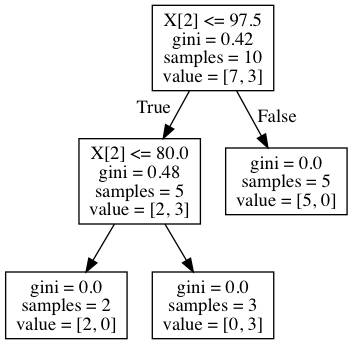

In [15]:
dot_data=StringIO()
sklearn.tree.export_graphviz(tree_gini,out_file=dot_data)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_pdf('./demo.pdf')
from IPython.display import Image
Image(graph.create_png())


In [20]:
# 用信息熵作为划分指标
tree_en=DecisionTreeClassifier(criterion='entropy',max_depth=6)
tree_en.fit(x,y)
tree_en.score(x,y)

1.0

In [21]:
import sklearn
from sklearn.externals.six import StringIO
import pydotplus

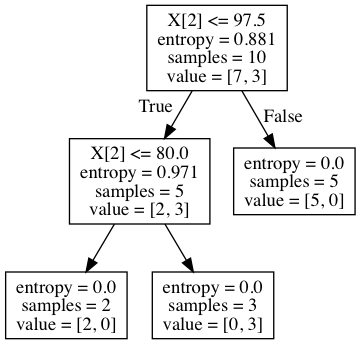

In [22]:
dot_data=StringIO()
sklearn.tree.export_graphviz(tree_en,out_file=dot_data)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_pdf("./demo_entropy.pdf")

from IPython.display import Image
Image(graph.create_png())

In [23]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(bootstrap=False,max_depth=1,n_estimators=30)
rf.fit(x,y)
rf.score(x,y)

0.9